# Final Project Report

* Class: DS 5100
* Student Name: Gwen Powers
* Student Net ID: gp8cf
* This URL: https://github.com/gwenpowers1/gwenpowers1_ds5100_montecarlo/blob/main/FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/gwenpowers1/gwenpowers1_ds5100_montecarlo

```
import pandas as pd
import numpy as np
from itertools import combinations_with_replacement, product
```

```
class Die:
    '''creates a Die with N sides and W weight that can be rolled to select a face, each of which has a unique symbol that is alphabetic or numeric. W defaults to 1.0 but can be changed after the Die is created. '''
    
    def __init__(self, symbols):
        '''
        Takes a list of symbols as an argument and internally initializes the weights to 1.0 for each symbol.
        Saves both symbols and weights in a private data frame with symbols in the index.
        
        :param symbols: List of symbols for the die sides.
        '''
        if not isinstance(symbols, list):
            raise TypeError("Input must be a list of symbols")
        
        if len(symbols) != len(set(symbols)):
            raise ValueError("Symbols must be unique")
        
        if all(isinstance(s, str) and (s.isnumeric() or s.isalpha()) for s in symbols):
            self.symbols = symbols
        else:
            raise ValueError("Symbols must be all alphabetic or all numeric")
        
        self.weights = np.ones(len(symbols))  # Initializing weights to 1.0 for each symbol
        self._data_frame = pd.DataFrame({"Weights": self.weights}, index=self.symbols)
    
    def change_weight(self, symbol, new_weight):
        '''
        A method to change the weight of a single side.
        
        Takes two arguments: the symbol to be changed and the new weight.
        
        :param symbol: The symbol to be changed.
        :param new_weight: The new weight to be assigned.
        '''
        if symbol not in self.symbols:
            raise IndexError("Invalid symbol")
        
        if not isinstance(new_weight, (int, float)):
            raise TypeError("Weight must be numeric")
        
        self.weights[self.symbols.index(symbol)] = new_weight
        self._data_frame.loc[symbol, "Weights"] = new_weight
    
    def roll_die(self, x=1):
        '''
        Rolls the die x times, x defaults to 1, while applying its N and W attributes, returns a list of outcomes but does not store these internally.
        
        :param x: Number of times to roll the die.
        :return: List of outcomes from rolling the die x times.
        '''
        outcomes = np.random.choice(self.symbols, size=x, p=self.weights / np.sum(self.weights))
        return outcomes.tolist()
    
    def current_die(self):
        '''
        Returns a copy of the private die data frame.
        '''
        return self._data_frame.copy()
```

    
```   
class Game:
    '''Creates a Game consisting of inputing one or more Die objects (dice), with the same number of sides and associated faces, but possibly different weights. This class rolls all of the Die in a Game a given number of times and only keeps the most recent play.'''
    
    def __init__(self, dice_list):
        '''
        Takes a list of instantiated similar Die.
        
        :param dice_list: List of Die objects.
        '''
        self.dice = dice_list
        self.play_data = pd.DataFrame()
    
    def play(self, x):
        '''
        Takes an integer value of how many times the Die should be rolled and save the result to a private, wide dataframe.
        
        :param x: Number of times to roll the dice.
        '''
        play_results = {}
        
        for roll_num in range(1, x+1):
            roll_outcomes = {}
            for die_idx, die in enumerate(self.dice):
                outcome = die.roll_die(1)[0]
                roll_outcomes[f"Die_{die_idx}"] = outcome
            
            play_results[roll_num] = roll_outcomes
        
        self.play_data = pd.DataFrame.from_dict(play_results, orient='index')
    
    
    def play_results(self, df_width='wide'):
        '''
        Returns results of the most recent play, takes parameter to determine whether this should be a wide or narrow dataframe (defaults to wide), and raises a ValueError if invalid option for df_width (not narrow or wide) is given.
    
        :param df_width: Option to return the data frame in 'narrow' or 'wide' form (defaults to 'wide').
        :return: Copy of the private play data frame.
        '''
        if df_width == 'wide':
            return self.play_data.copy()
        elif df_width == 'narrow':
            narrow_data = []
            for roll_num, outcomes in self.play_data.iterrows():
                for die_num, outcome in outcomes.items():
                    narrow_data.append([roll_num, f"Die_{die_num}", outcome])
            narrow_df = pd.DataFrame(narrow_data, columns=['Roll', 'Die', 'Outcome'])
            narrow_df.set_index(['Roll', 'Die'], inplace=True)  # Set index with a list of column names as strings
            return narrow_df
        else:
            raise ValueError("Invalid option for df_width. Use 'narrow' or 'wide'.")

```

    
```    
class Analyzer:   
    '''Creates an Analyzer which takes the results of a single game and computes various statistical properties about it.'''

    def __init__(self, game):
        '''
        Takes a Game object, throws an error if input is not a Game.
        
        :param game: Game object.
        '''
        if not isinstance(game, Game):
            raise ValueError("Input must be a Game object.")
        self.game = game
        self.results = game.play_data
    
    def jackpot(self):
        '''
        Computes and returns as an integer how many times the game resulted in a jackpot, when all faces are the same.
        
        :return: Number of jackpots.
        '''
        jackpot_count = 0
        for _, outcomes in self.results.iterrows():
            if all(outcome == outcomes[0] for outcome in outcomes):
                jackpot_count += 1
        return jackpot_count
    def face_counts_per_roll(self, face):
        '''
        Computes how many times a given face is rolled in each event and returns a dataframe of results.
    
        :param face: Face value to compute counts for.
        :return: Data frame with counts for the given face value.
        '''
        face_counts = {}
        for roll_num, outcomes in self.results.iterrows():
            face_count = outcomes.tolist().count(face)
            face_counts[roll_num] = face_count
    
        return pd.DataFrame({f'Face_{face}_Count': face_counts})
     
    
    def combo_count(self):
        '''
        Computes the distinct combinations of faces rolled and their counts and returns a dataframe of results. These are order-independent and may contain repetitions.
        
        :return: Data frame with distinct combinations and their counts.
        '''
        combo_counts = {}
        for _, outcomes in self.results.iterrows():
            unique_combinations = set(combinations_with_replacement(outcomes, len(self.game.dice)))
            for combo in unique_combinations:
                combo_counts.setdefault(combo, 0)
                combo_counts[combo] += 1
        
        combo_df = pd.DataFrame(combo_counts.items(), columns=['Combo', 'Count'])
        combo_df['Combo'] = combo_df['Combo'].apply(lambda x: tuple(sorted(x)))
        combo_df = combo_df.groupby('Combo')['Count'].sum().reset_index()
        
        return combo_df.set_index('Combo')
    
    def permutation_count(self):
        '''
        Computes the distinct permutations of faces rolled and their counts and returns a dataframe of results. These are order-dependent and may contain repetitions
        
        :return: Data frame with distinct permutations and their counts.
        '''
        perm_counts = {}
        for _, outcomes in self.results.iterrows():
            unique_permutations = set(product(outcomes, repeat=len(self.game.dice)))
            for perm in unique_permutations:
                perm_counts.setdefault(perm, 0)
                perm_counts[perm] += 1
        
        perm_df = pd.DataFrame(perm_counts.items(), columns=['Permutation', 'Count'])
        perm_df['Permutation'] = perm_df['Permutation'].apply(lambda x: tuple(x))
        perm_df = perm_df.groupby('Permutation')['Count'].sum().reset_index()
        
        perm_df['Permutation'] = pd.MultiIndex.from_tuples(perm_df['Permutation'])
        perm_df.set_index('Permutation', inplace=True)
        
        return perm_df
```


## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import unittest
import pandas as pd
import numpy as np
from montecarlo import Die, Game, Analyzer
from itertools import combinations_with_replacement, product
```

```
class TestDieMethods(unittest.TestCase):

    def test_init(self):
        symbols = ['1', '2', '3', '4', '5', '6']
        die = Die(symbols)
        self.assertEqual(die.symbols, symbols)
        self.assertEqual(die.weights.tolist(), [1.0] * 6)

    def test_change_weight(self):
        symbols = ['1', '2', '3', '4', '5', '6']
        die = Die(symbols)
        die.change_weight('1', 2.0)
        self.assertEqual(die.weights.tolist(), [2.0, 1.0, 1.0, 1.0, 1.0, 1.0])

    def test_roll_die(self):
        symbols = ['1', '2', '3', '4', '5', '6']
        die = Die(symbols)
        outcomes = die.roll_die(100)
        self.assertEqual(len(outcomes), 100)

    
    def test_current_die(self):
        symbols = ['1', '2', '3', '4', '5', '6']
        die = Die(symbols)
        current_data_frame = die.current_die()
        self.assertEqual(current_data_frame.shape[0], 6)
```
```
class TestGameMethods(unittest.TestCase):

    def test_init(self):
        die1 = Die(['1', '2', '3', '4', '5', '6'])
        die2 = Die(['A', 'B', 'C', 'D', 'E', 'F'])
        game = Game([die1, die2])
        self.assertEqual(len(game.dice), 2)

    def test_play(self):
        die1 = Die(['1', '2', '3', '4', '5', '6'])
        die2 = Die(['A', 'B', 'C', 'D', 'E', 'F'])
        game = Game([die1, die2])
        game.play(10)
        self.assertEqual(game.play_data.shape, (10, 2))
        
    def test_play_results(self):
        die1 = Die(['1', '2', '3', '4', '5', '6'])
        die2 = Die(['A', 'B', 'C', 'D', 'E', 'F'])
        game = Game([die1, die2])
        game.play(10)
        
        play_results_wide = game.play_results('wide')
        play_results_narrow = game.play_results('narrow')
        
        self.assertIsInstance(play_results_wide, pd.DataFrame)
        self.assertIsInstance(play_results_narrow, pd.DataFrame)
        self.assertEqual(play_results_wide.shape, (10, 2))
        
        self.assertEqual(play_results_narrow.index.names, ['Roll', 'Die'])
```

```
class TestAnalyzerMethods(unittest.TestCase):

    def test_init(self):
        die1 = Die(['1', '2', '3', '4', '5', '6'])
        die2 = Die(['A', 'B', 'C', 'D', 'E', 'F'])
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)

    def test_jackpot(self):
        self.test_init()  # Call your custom initialization method
        jackpot_count = self.analyzer.jackpot()
        self.assertIsInstance(jackpot_count, int)

    def test_face_counts_per_roll(self):
        self.test_init()  # Call your custom initialization method
        face = '1'
        face_counts_df = self.analyzer.face_counts_per_roll(face)
        self.assertIsInstance(face_counts_df, pd.DataFrame)

    def test_combo_count(self):
        self.test_init()  # Call your custom initialization method
        combo_counts_df = self.analyzer.combo_count()
        self.assertIsInstance(combo_counts_df, pd.DataFrame)

    def test_permutation_count(self):
        self.test_init()  # Call your custom initialization method
        perm_counts_df = self.analyzer.permutation_count()
        self.assertIsInstance(perm_counts_df, pd.DataFrame)
```

```       
if __name__ == '__main__':
    unittest.main()
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo)

Help on module montecarlo:

NAME
    montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  Creates an Analyzer which takes the results of a single game and computes various statistical properties about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Takes a Game object, throws an error if input is not a Game.
     |      
     |      :param game: Game object.
     |  
     |  combo_count(self)
     |      Computes the distinct combinations of faces rolled and their counts and returns a dataframe of results. These are order-independent and may contain repetitions.
     |      
     |      :return: Data frame with distinct combinations and their counts.
     |  
     |  face_counts_per_roll(self, face)
     |      Computes how many times a given face is rolled in each event and returns a dataframe of results.
     |      
     |      :p

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/gwenpowers1/gwenpowers1_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

sktop/ds5100_montecarlo/dist/ds5100_montecarlo-1.0.0.tar.gz
Processing ./dist/ds5100_montecarlo-1.0.0.tar.gz
  Preparing metadata (setup.py) ... done
Requirement already satisfied: numpy in /Users/gwenpowers/anaconda3/lib/python3.10/site-packages (from ds5100-montecarlo==1.0.0) (1.23.5)
Requirement already satisfied: pandas in /Users/gwenpowers/anaconda3/lib/python3.10/site-packages (from ds5100-montecarlo==1.0.0) (1.5.3)
Requirement already satisfied: python-dateutil>=2.8.1 in /Users/gwenpowers/anaconda3/lib/python3.10/site-packages (from pandas->ds5100-montecarlo==1.0.0) (2.8.2)
Requirement already satisfied: pytz>=2020.1 in /Users/gwenpowers/anaconda3/lib/python3.10/site-packages (from pandas->ds5100-montecarlo==1.0.0) (2022.7)
Requirement already satisfied: six>=1.5 in /Users/gwenpowers/anaconda3/lib/python3.10/site-packages (from python-dateutil>=2.8.1->pandas->ds5100-montecarlo==1.0.0) (1.16.0)
Building wheels for collected packages: ds5100-montecarlo
  Building wheel for ds5100-montecarlo (setup.py) ... done
  Created wheel for ds5100-montecarlo: filename=ds5100_montecarlo-1.0.0-py3-none-any.whl size=1056 sha256=feee2da9831a8e6f8d3b1956c0d953fded208e5bd7ed2130fec6815aceb039fb
  Stored in directory: /Users/gwenpowers/Library/Caches/pip/wheels/2d/4b/e3/016cf945fbf43e17b18e8acf2273b1b9ad09354aacfe3b03be
Successfully built ds5100-montecarlo
Installing collected packages: ds5100-montecarlo
Successfully installed ds5100-montecarlo-1.0.0

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [19]:
import pandas as pd
import numpy as np
from itertools import product, combinations_with_replacement
import matplotlib.pyplot as plt
from montecarlo import Die, Game, Analyzer

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [4]:
fair_coin = Die(['H', 'T'])
unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5.0)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [5]:
fair_die1 = Die(['H', 'T'])
fair_die2 = Die(['H', 'T'])

game = Game([fair_die1, fair_die2])

game.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [6]:
unfair_die = Die(['H', 'T'])  
unfair_coin.change_weight('H', 5.0)
fair_die = Die(['H', 'T'])

game = Game([unfair_die, unfair_die, fair_die])

game.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [7]:
fair_coin = Die(['H', 'T'])

unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5.0)

fair_game = Game([fair_coin, fair_coin])
fair_game.play(1000)

unfair_die1 = Die(['H', 'T'])
unfair_die1.change_weight('H', 5.0)
unfair_die2 = Die(['H', 'T'])
unfair_die2.change_weight('H', 5.0)
fair_die = Die(['H', 'T'])
unfair_game = Game([unfair_die1, unfair_die2, fair_die])
unfair_game.play(1000)

fair_analyzer = Analyzer(fair_game)
unfair_analyzer = Analyzer(unfair_game)

fair_jackpot_count = fair_analyzer.jackpot()
unfair_jackpot_count = unfair_analyzer.jackpot()

print("Fair Game Jackpot Count:", fair_jackpot_count)
print("Unfair Game Jackpot Count:", unfair_jackpot_count)

Fair Game Jackpot Count: 485
Unfair Game Jackpot Count: 374


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [8]:
total_rolls_fair = fair_game.play_data.shape[0]
total_rolls_unfair = unfair_game.play_data.shape[0]

relative_frequency_fair = fair_jackpot_count / total_rolls_fair
relative_frequency_unfair = unfair_jackpot_count / total_rolls_unfair

print("Relative Frequency of Jackpots in Fair Game:", relative_frequency_fair)
print("Relative Frequency of Jackpots in Unfair Game:", relative_frequency_unfair)


Relative Frequency of Jackpots in Fair Game: 0.485
Relative Frequency of Jackpots in Unfair Game: 0.374


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

(0.0, 1.0)

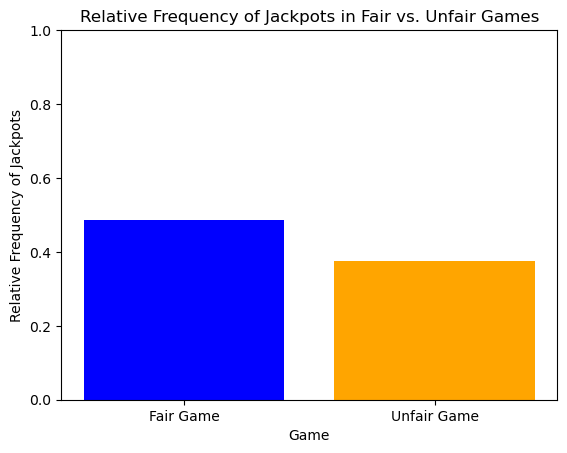

In [9]:
labels = ['Fair Game', 'Unfair Game']
relative_frequencies = [relative_frequency_fair, relative_frequency_unfair]

plt.bar(labels, relative_frequencies, color=['blue', 'orange'])
plt.xlabel('Game')
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Relative Frequency of Jackpots in Fair vs. Unfair Games')
plt.ylim(0, 1)

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [10]:
die1 = Die(['1', '2', '3', '4', '5', '6'])
die2 = Die(['1', '2', '3', '4', '5', '6'])
die3 = Die(['1', '2', '3', '4', '5', '6'])

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [11]:
die1.change_weight('6', 5.0)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [12]:
die2.change_weight('1', 5.0)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [13]:
fair_dice = [die3, die3, die3, die3, die3]
fair_game = Game(fair_dice)
fair_game.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
unfair_dice = [die1, die2, die3, die3, die3]
unfair_game = Game(unfair_dice)
unfair_game.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Text(0.5, 1.0, 'Relative Frequency of Jackpots in Fair vs. Unfair Games')

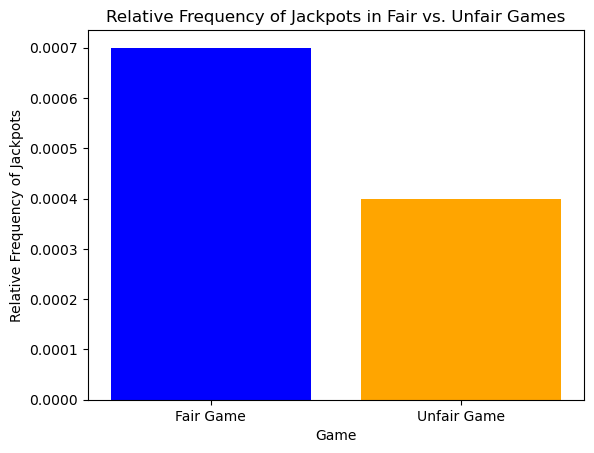

In [15]:
# Fair game
fair_analyzer = Analyzer(fair_game)
fair_jackpot_count = fair_analyzer.jackpot()
total_rolls_fair = fair_game.play_data.shape[0]
relative_frequency_fair = fair_jackpot_count / total_rolls_fair

# Unfair game
unfair_analyzer = Analyzer(unfair_game)
unfair_jackpot_count = unfair_analyzer.jackpot()
total_rolls_unfair = unfair_game.play_data.shape[0]
relative_frequency_unfair = unfair_jackpot_count / total_rolls_unfair

games = ['Fair Game', 'Unfair Game']
relative_frequencies = [relative_frequency_fair, relative_frequency_unfair]
plt.bar(games, relative_frequencies, color=['blue', 'orange'])
plt.xlabel('Game')
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Relative Frequency of Jackpots in Fair vs. Unfair Games')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [26]:
letter_freq_data = pd.read_csv('english_letters.txt', sep=' ', header=None, names=['Letter', 'Frequency'])

letter_frequencies = dict(zip(letter_freq_data['Letter'], letter_freq_data['Frequency']))

letters = [chr(i) for i in range(ord('A'), ord('Z') + 1)]

weights = [letter_frequencies[letter] for letter in letters]

letter_die = Die(letters)
for letter, weight in zip(letters, weights):
    letter_die.change_weight(letter, weight)


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [27]:
dice_list = [letter_die] * 4
game = Game(dice_list)
game.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [28]:
with open('scrabble_words.txt', 'r') as file:
    valid_words = set(word.strip().upper() for word in file)

analyzer = Analyzer(game)

permutation_df = analyzer.permutation_count()
valid_word_count = sum(''.join(permutation) in valid_words for permutation, _ in permutation_df.iterrows())

print(f"Number of valid English words: {valid_word_count}")

Number of valid English words: 1602


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [30]:
dice_list_5 = [letter_die] * 5
game_5_dice = Game(dice_list_5)
game_5_dice.play(1000)

analyzer_5_dice = Analyzer(game_5_dice)

permutation_df_5_dice = analyzer_5_dice.permutation_count()
valid_word_count_5_dice = sum(''.join(permutation) in valid_words for permutation, _ in permutation_df_5_dice.iterrows())

print(f"Number of valid English words with 5 dice: {valid_word_count_5_dice}")

if valid_word_count_5_dice > valid_word_count:
    print("Using 5 dice produced more valid English words.")
else:
    print("Using 4 dice produced more valid English words.")

Number of valid English words with 5 dice: 2625
Using 5 dice produced more valid English words.


# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.